<h1 style = "font-size:40px; font-family:Garamond ; font-weight : normal; background-color: #EC5555 ; color : white; text-align: center; border-radius: 100px 100px;padding:10px">Stock Price Prediction</h1>
<img src="https://images.cnbctv18.com/wp-content/uploads/2021/06/trending-stocks-1019x573.jpg">

<h1 style="font-size:30px; font-family:Garamond ; font-weight : normal"><b>What is a stock?</b></h1>

A stock (also known as equity) is a security that represents the ownership of a fraction of a corporation. This entitles the owner of the stock to a proportion of the corporation's assets and profits equal to how much stock they own. Units of stock are called "shares."
Stocks are bought and sold predominantly on stock exchanges, though there can be private sales as well, and are the foundation of many individual investors' portfolios. These transactions have to conform to government regulations which are meant to protect investors from fraudulent practices. Historically, they have outperformed most other investments over the long run.1﻿ These investments can be purchased from most online stock brokers.

**KEY TAKEAWAYS** 

`1) A stock is a form of security that indicates the holder has proportionate ownership in the issuing corporation.`<br>
`2) Corporations issue (sell) stock to raise funds to operate their businesses. There are two main types of stock: common and preferred.`<br>
`3) Stocks are bought and sold predominantly on stock exchanges, though there can be private sales as well, and they are the foundation of nearly every portfolio.`<br>
`4) Historically, they have outperformed most other investments over the long run.`

<h1 style="font-size:30px; font-family:Garamond ; font-weight : normal"><b>Problem Statement</b></h1>

The data (last updated 11/10/2017) is presented in CSV format as follows: Date, Open, High, Low, Close, Volume, OpenInt. Note that prices have been adjusted for dividends and splits.

<h1 style="font-size:30px; font-family:Garamond ; font-weight : normal"><b>Way Ahead</b></h1>
In this notebook we will see the use of LSTM on stock data to predict the future stock prices. Also how to read the data and import into pandas dataframe.

<br>
<h1 style = "font-size:40px; font-family:Garamond ; font-weight : normal; background-color: #EC5555 ; color : white; text-align: center; border-radius: 100px 100px;padding:10px">Content </h1>
<br>
<p id="toc"></p>

--- 
<h3 style="text-indent: 3vw; font-family: Garamond; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; color: black; background-color: white;"><a href="#OV" style="color:red;text-decoration:none">&nbsp;&nbsp;&nbsp;&nbsp;1.Data Read and Import</a></h3>

---
<h3 style="text-indent: 3vw; font-family: Garamond; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; color: navy; background-color: #ffffff;"><a href="#eda" style="color:red;text-decoration:none">&nbsp;&nbsp;&nbsp;&nbsp;2.EDA</a></h3>

---
<h3 style="text-indent: 3vw; font-family: Garamond; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; color: navy; background-color: #ffffff;"><a href="#model" style="color:red;text-decoration:none">&nbsp;&nbsp;&nbsp;&nbsp;3.Model Building</a></h3>

---
<h3 style="text-indent: 3vw; font-family: Garamond; font-size: 20px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; color: navy; background-color: #ffffff;"><a href="#results" style="color:red;text-decoration:none">&nbsp;&nbsp;&nbsp;&nbsp;4.Conclusion and Further improvement</a></h3>

---

<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; background-color: #ffffff; color: navy;">Import Libraires&nbsp;&nbsp;&nbsp;&nbsp;</h1> 

In [ ]:
!pip install pmdarima

In [57]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(16,8)})
sns.set(font_scale=1.3)
plt.style.use('fivethirtyeight')

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, RepeatVector, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import warnings
warnings.filterwarnings('ignore')

import plotly
import plotly.graph_objs as go
import plotly.express as ex

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [2]:
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

price-volume-data-for-all-us-stocks-etfs



<a id = "OV"></a><h1 id="Libraries and Utilities"><span class="label label-default" style="background-color:#EC5555; border-radius:100px 100px; font-weight: bold; font-family:Garamond; font-size:20px; color:white; padding:10px">Data Read</span></h1>

In [3]:
import os
os.chdir('../input/price-volume-data-for-all-us-stocks-etfs/Stocks/')
list = os.listdir()
number_files = len(list)
print(number_files)

7195


In [5]:
import random
filenames = random.sample([x for x in os.listdir() if x.endswith('.txt') 
                           and os.path.getsize(os.path.join('',x)) > 0], 8)
print(filenames)

['are_d.us.txt', 'jbk.us.txt', 'macq.us.txt', 'ecf_a.us.txt', 'sfly.us.txt', 'htus.us.txt', 'eaglu.us.txt', 'asb-ws.us.txt']


In [6]:
data = []
for filename in filenames:
    df = pd.read_csv(os.path.join('',filename), sep=',')
    label, _, _ = filename.split(sep='.')
    df['Label'] = label
    df['Date'] = pd.to_datetime(df['Date'])

    data.append(df)

In [1]:
data

NameError: name 'data' is not defined

<a id = "eda"></a><h1 id="Libraries and Utilities"><span class="label label-default" style="background-color:#EC5555; border-radius:100px 100px; font-weight: bold; font-family:Garamond; font-size:20px; color:white;padding:10px ">EDA</span></h1>

In [12]:
data[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     423 non-null    datetime64[ns]
 1   Open     423 non-null    float64       
 2   High     423 non-null    float64       
 3   Low      423 non-null    float64       
 4   Close    423 non-null    float64       
 5   Volume   423 non-null    int64         
 6   OpenInt  423 non-null    int64         
 7   Label    423 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 26.6+ KB


In [13]:
data[0].describe()

,Open,High,Low,Close,Volume,OpenInt
count,423.000000,423.000000,423.000000,423.000000,4.230000e+02,423.0
mean,33.653749,33.882192,33.486734,33.715089,3.776737e+04,0.0
std,3.069363,3.053180,3.078913,3.058144,1.966944e+05,0.0
min,26.700000,27.000000,26.500000,26.700000,0.000000e+00,0.0
25%,32.555000,33.045000,32.495000,32.750000,9.250000e+02,0.0
50%,34.890000,35.063000,34.750000,34.900000,2.502000e+03,0.0
75%,35.530050,35.687600,35.350000,35.580000,9.670500e+03,0.0
max,37.300000,37.450000,37.300000,37.450000,2.855471e+06,0.0


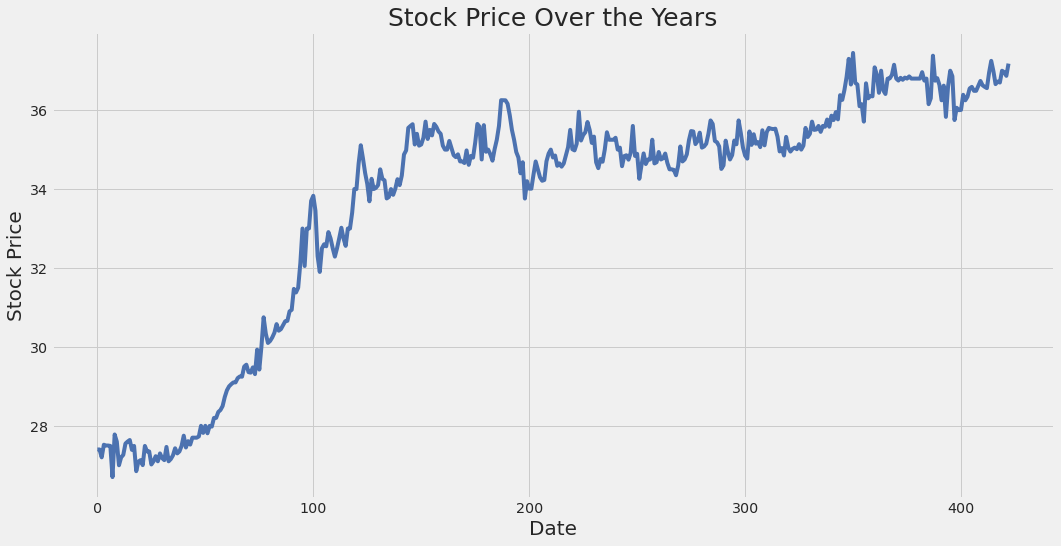

In [17]:
data[0] = data[0].sort_values('Date')
plt.figure(figsize=(16,8))
plt.plot(data[0]['Close'], label='Close Price history',color='b')
plt.xlabel('Date',size=20)
plt.ylabel('Stock Price',size=20)
plt.title('Stock Price Over the Years',size=25);

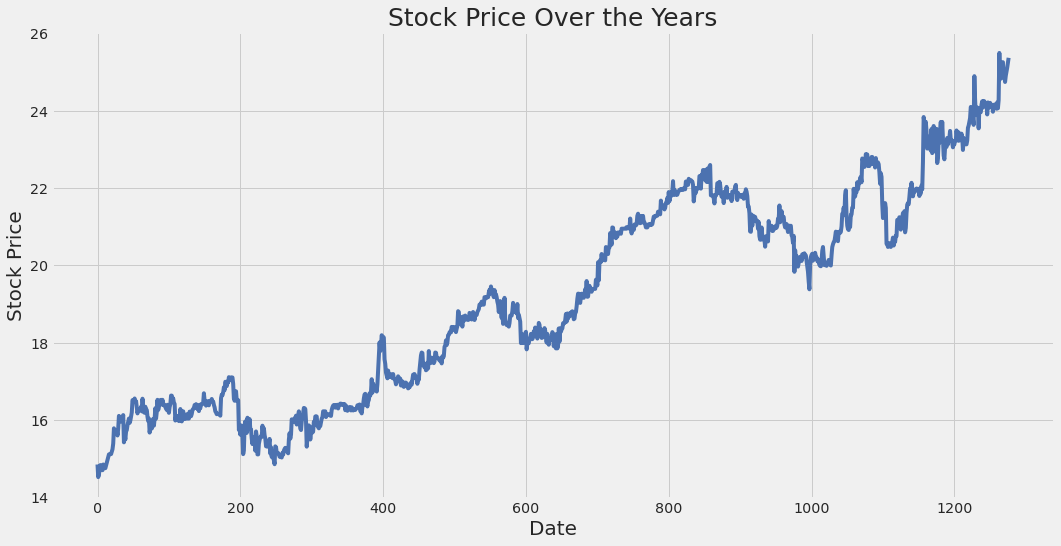

In [18]:
data[1] = data[1].sort_values('Date')
plt.figure(figsize=(16,8))
plt.plot(data[1]['Close'], label='Close Price history',color='b')
plt.xlabel('Date',size=20)
plt.ylabel('Stock Price',size=20)
plt.title('Stock Price Over the Years',size=25);

<a id = "model"></a><h1 id="Libraries and Utilities"><span class="label label-default" style="background-color:#EC5555; border-radius:100px 100px; font-weight: bold; font-family:Garamond; font-size:20px; color:white;padding:10px ">Model Building</span></h1>

<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; background-color: #ffffff; color: navy;">Functions for LSTM Model Training&nbsp;&nbsp;&nbsp;&nbsp;</h1> 

In [19]:
# Normalizes the data
def to_dataset(data):
    data = data.astype('float32')
    #scaler = MinMaxScaler(feature_range=(0,1))
    #return scaler.fit_transform(data)
    return data/255.

# Data train and test
def train_test(data):
    train_size = int(len(data) * 0.75)
    train, test = data[0:train_size, :], data[train_size:len(data), :]
    return train, test

# Time windows - use 10 days to forecast the nest 10 days 
def windows(sequence, step_in, step_out):
    x, y = [], []
    for i in range(len(sequence)):
        end_i = i + step_in
        out_i = end_i + step_out
        if out_i > len(sequence):
            break
        seq_x, seq_y = sequence[i:end_i, :], sequence[end_i:out_i, :]
        x.append(seq_x)
        y.append(seq_y)
    return np.array(x), np.array(y)

# Model
def creat_model(step_in, step_out, features):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(step_in, features)))
    model.add(RepeatVector(step_out))
    model.add(LSTM(200, activation='relu', return_sequences=True))
    model.add(TimeDistributed(Dense(features)))
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
    return model

# Run all functions
def prepare_training(data, step_in, step_out):
    data = to_dataset(data)
    train, test = train_test(data)
    x_train, x_test = windows(train, step_in, step_out)
    y_train, y_test = windows(test, step_in, step_out)
    features = 1
    return x_train, x_test, y_train, y_test, features

<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; background-color: #ffffff; color: navy;">Declare default values for the parameters&nbsp;&nbsp;&nbsp;&nbsp;</h1> 

In [20]:
step_in, step_out = 10, 10 
epochs = 50 
batch_size = 32

early = EarlyStopping(monitor='val_loss',patience=5)
reduce = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.2, mil_lr=0.001)

<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; background-color: #ffffff; color: navy;">Data for Dataset 1&nbsp;&nbsp;&nbsp;&nbsp;</h1> 

In [21]:
df = data[0]['Close'].values
df = df.reshape(-1, 1)

In [25]:
## SPlit data into train and test
x_train, y_train, x_test, y_test, feature = prepare_training(df, step_in, step_out)

In [26]:
model = creat_model(step_in, step_out, feature)

<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; background-color: #ffffff; color: navy;">Train the Model&nbsp;&nbsp;&nbsp;&nbsp;</h1> 

In [27]:
history = model.fit(x_train, y_train, epochs=epochs, batch_size=50, verbose=1,
         validation_data=(x_test, y_test), callbacks=[early,reduce])

Epoch 1/50
6/6 [==============================] - 3s 115ms/step - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 2/50
6/6 [==============================] - 0s 43ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 3/50
6/6 [==============================] - 0s 42ms/step - loss: 0.0030 - mean_squared_error: 0.0030 - val_loss: 0.0019 - val_mean_squared_error: 0.0019
Epoch 4/50
6/6 [==============================] - 0s 40ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 5/50
6/6 [==============================] - 0s 39ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 6/50
6/6 [==============================] - 0s 33ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 7/50
6/6 [=============================

<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; background-color: #ffffff; color: navy;">Plot the Loss and Accuracy curves&nbsp;&nbsp;&nbsp;&nbsp;</h1> 

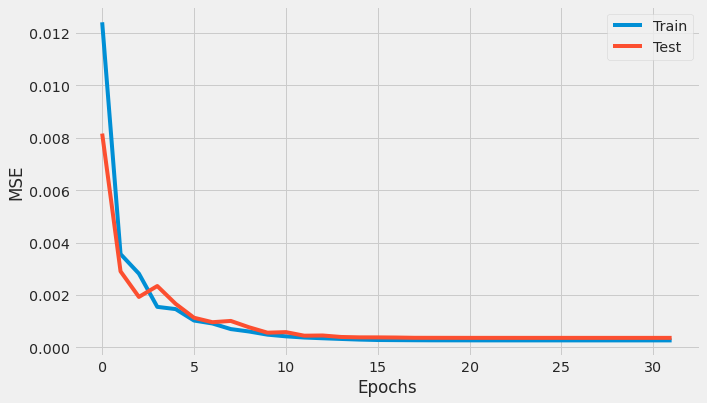

In [83]:
# # summarize history for metric
# fig=go.Figure()
# fig.add_trace(go.Scatter(x=[n for n in range(1,51)],
#                          y=history.history['loss'],
#                          name="Training Loss",
#                          mode="markers+lines",
#                          marker=dict(color='green',size=4)))
# fig.add_trace(go.Scatter(x=[n for n in range(1,51)],
#                          y=history.history['val_loss'],
#                          name="Validation Loss",
#                          mode="markers+lines",
#                          marker=dict(color='red',size=4)))
# fig.update_layout(title="Model Loss - Training and Validation",
#                   xaxis_title="Epochs",
#                   yaxis_title="MAE(Mean Absolute Error)",
#                   template="plotly_dark"
#                  )
# fig.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(['Train','Test']);

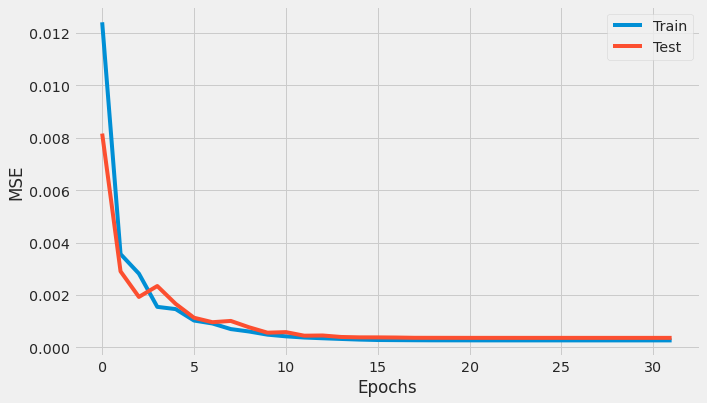

In [84]:
# summarize history for metric
# fig=go.Figure()
# fig.add_trace(go.Scatter(x=[n for n in range(1,51)],
#                          y=history.history['mean_squared_error'],
#                          name="Training MAE",
#                          mode="markers+lines",
#                          marker=dict(color='green',size=4)))
# fig.add_trace(go.Scatter(x=[n for n in range(1,51)],
#                          y=history.history['val_mean_squared_error'],
#                          name="Validation MAE",
#                          mode="markers+lines",
#                          marker=dict(color='red',size=4)))
# fig.update_layout(title="Model Metric - Training and Validation",
#                   xaxis_title="Epochs",
#                   yaxis_title="MAE(Mean Absolute Error)",
#                   template="plotly_dark"
#                  )
# fig.show()

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend(['Train','Test']);

<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; background-color: #ffffff; color: navy;">Make Predictions&nbsp;&nbsp;&nbsp;&nbsp;</h1> 

In [32]:
pred = model.predict(x_test)

In [34]:
## rescale the data
y_act = x_test[0]*255.0
y_pred = pred[0]*255.0

In [53]:
y_act.reshape(1,10)[0]

array([35.039 , 34.85  , 35.3223, 35.05  , 34.95  , 35.02  , 35.05  ,
       35.01  , 35.1378, 35.    ], dtype=float32)

In [46]:
y_pred

array([[23.43371 ],
       [31.713959],
       [35.32159 ],
       [36.27073 ],
       [35.90525 ],
       [35.006573],
       [34.010117],
       [33.13114 ],
       [32.450787],
       [31.975933]], dtype=float32)

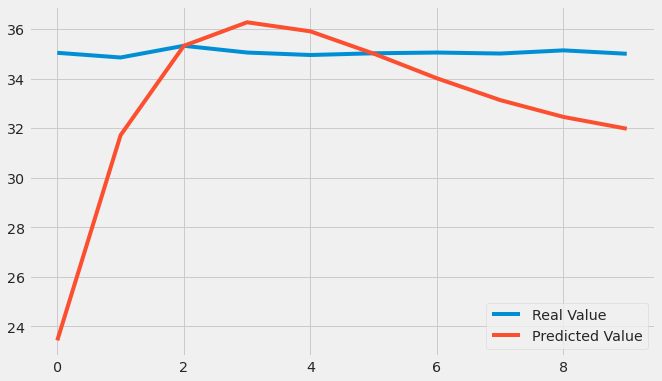

In [86]:
# fig=go.Figure()
# fig.add_trace(go.Scatter(x=[n for n in range(1,10)],
#                          y=y_act.reshape(1,10)[0],
#                          name="Test Actual",
#                          mode="markers+lines",
#                          marker=dict(color='green',size=4)))
# fig.add_trace(go.Scatter(x=[n for n in range(1,10)],
#                          y=y_pred.reshape(1,10)[0],
#                          name="Test Predicted",
#                          mode="markers+lines",
#                          marker=dict(color='red',size=4)))
# fig.update_layout(title="LSTM Model Prediction",
#                   xaxis_title="Values",
#                   yaxis_title="Days",
#                   template="plotly_dark"
#                  )
# fig.show()

plt.plot(y_act)
plt.plot(y_pred)
plt.legend(['Real Value','Predicted Value']);

<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; background-color: #ffffff; color: navy;">ARIMA Model Training&nbsp;&nbsp;&nbsp;&nbsp;</h1> 

A popular and widely used statistical method for time series forecasting is the ARIMA model. Exponential smoothing and ARIMA models are the two most widely used approaches to time series forecasting and provide complementary approaches to the problem. While exponential smoothing models are based on a description of the trend and seasonality in the data, ARIMA models aim to describe the autocorrelations in the data.

**`Stationarity`**

A stationary time series data is one whose properties do not depend on the time, That is why time series with trends, or with seasonality, are not stationary. the trend and seasonality will affect the value of the time series at different times, On the other hand for stationarity it does not matter when you observe it, it should look much the same at any point in time. In general, a stationary time series will have no predictable patterns in the long-term.

ARIMA is an acronym that stands for Auto-Regressive Integrated Moving Average. It is a class of model that captures a suite of different standard temporal structures in time series data.

In this tutorial, We will talk about how to develop an ARIMA model for time series forecasting in Python.

An ARIMA model is a class of statistical models for analyzing and forecasting time series data. It is really simplified in terms of using it, Yet this model is really powerful.

ARIMA stands for Auto-Regressive Integrated Moving Average.

The parameters of the ARIMA model are defined as follows:

p: The number of lag observations included in the model, also called the lag order.<br>
d: The number of times that the raw observations are differenced, also called the degree of difference.<br>
q: The size of the moving average window, also called the order of moving average.<br>
A linear regression model is constructed including the specified number and type of terms, and the data is prepared by a degree of differencing in order to make it stationary, i.e. to remove trend and seasonal structures that negatively affect the regression model.

**`Test for Stationarity`**

To identify the nature of data, we will be using the null hypothesis.

H0: The null hypothesis: It is a statement about the population that either is believed to be true or is used to put forth an argument unless it can be shown to be incorrect beyond a reasonable doubt.

H1: The alternative hypothesis: It is a claim about the population that is contradictory to H0 and what we conclude when we reject H0.

#Ho: It is non-stationary
#H1: It is stationary
We will be considering the null hypothesis that data is not stationary and the alternate hypothesis that data is stationary.

<AxesSubplot:ylabel='Density'>

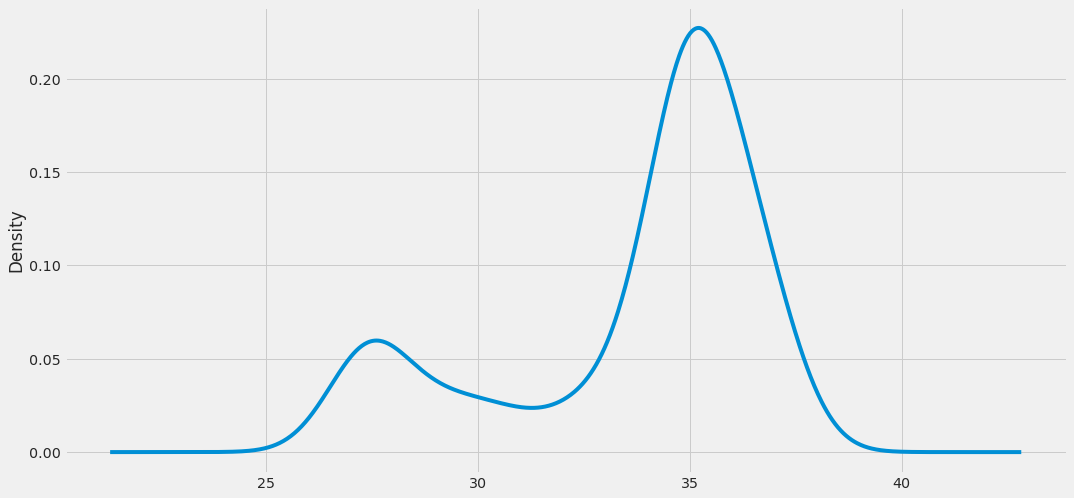

In [60]:
## Check KDE plot for 1 dataset
data[0]['Close'].plot(kind='kde')

<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; background-color: #ffffff; color: navy;">Priors On ARIMA Model&nbsp;&nbsp;&nbsp;&nbsp;</h1> 

<h1 style="font-family: Verdana; font-size: 15px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; background-color: #ffffff; color: red;">AD Fuller test&nbsp;&nbsp;&nbsp;&nbsp;</h1> 

In [62]:
def adfuller_test(stocks):
    result=adfuller(stocks)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

# if result[1] <= 0.05:
#     print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
# else:
#     print("weak evidence against null hypothesis,indicating it is non-stationary ")

In [63]:
adfuller_test(data[0]['Close'])

ADF Test Statistic : -1.8494685584649007
p-value : 0.35619294194041823
#Lags Used : 5
Number of Observations : 417


Here P-value is 0.36 which is greater than 0.05, which means data is accepting the null hypothesis, which means data is non-stationary.

<h1 style="font-family: Verdana; font-size: 15px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; background-color: #ffffff; color: red;">Differencing the data&nbsp;&nbsp;&nbsp;&nbsp;</h1> 

In [64]:
## Differencing the data
data[0]['Close First diff'] = data[0]['Close'] - data[0]['Close'].shift(1)
data[0]['Close Seasonal diff']=data[0]['Close']- data[0]['Close'].shift(12)
data[0].head()

,Date,Open,High,Low,Close,Volume,OpenInt,Label,Close First diff,Close Seasonal diff
0,2015-12-21,27.00,27.40,26.950,27.40,84791,0,are_d,NaN,NaN
1,2015-12-22,27.15,27.40,26.745,27.40,48638,0,are_d,0.00,NaN
2,2015-12-23,27.60,27.60,27.120,27.20,925,0,are_d,-0.20,NaN
3,2015-12-24,27.52,27.52,27.520,27.52,100,0,are_d,0.32,NaN
4,2015-12-29,26.75,27.50,26.750,27.50,30700,0,are_d,-0.02,NaN


In [65]:
# Again testing if data is stationary
adfuller_test(data[0]['Close Seasonal diff'].dropna())

ADF Test Statistic : -3.6552699798634776
p-value : 0.0047881702979626255
#Lags Used : 12
Number of Observations : 398


Here P-value is 0.004, which means we will be rejecting the null hypothesis. So data is stationary.

<h1 style="font-family: Verdana; font-size: 15px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; background-color: #ffffff; color: red;">Plotting the seasonal difference&nbsp;&nbsp;&nbsp;&nbsp;</h1> 

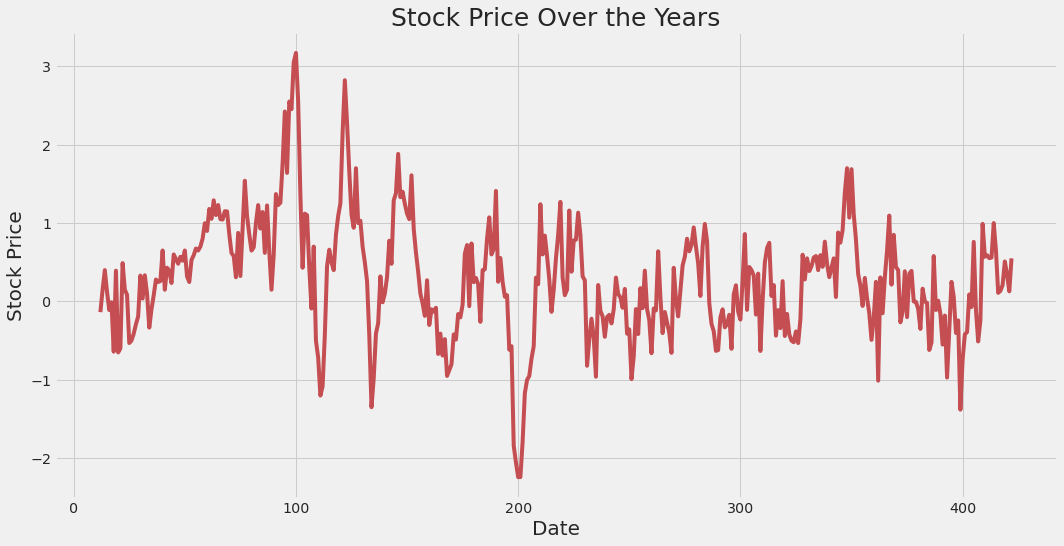

In [67]:
plt.figure(figsize=(16,8))
plt.plot(data[0]['Close Seasonal diff'], label='Close Seasonal Diff.',color='r')
plt.xlabel('Date',size=20)
plt.ylabel('Stock Price',size=20)
plt.title('Stock Price Over the Years',size=25);

<h1 style="font-family: Verdana; font-size: 15px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; background-color: #ffffff; color: red;">Plotting the autocorrelation plot&nbsp;&nbsp;&nbsp;&nbsp;</h1> 

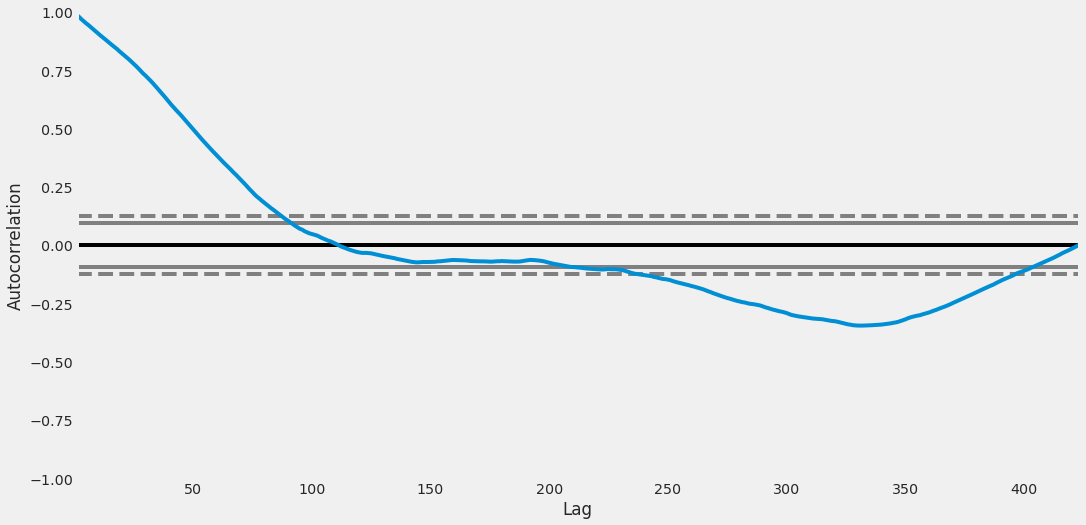

In [68]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data[0]['Close'])
plt.show()

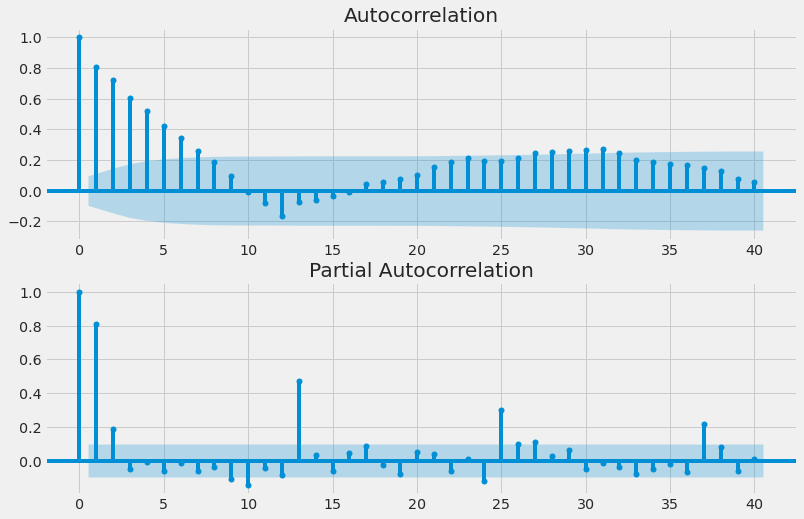

In [69]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data[0]['Close Seasonal diff'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data[0]['Close Seasonal diff'].dropna(),lags=40,ax=ax2)

<h1 style="font-family: Verdana; font-size: 15px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; background-color: #ffffff; color: red;">Performing Auto Arima&nbsp;&nbsp;&nbsp;&nbsp;</h1> 

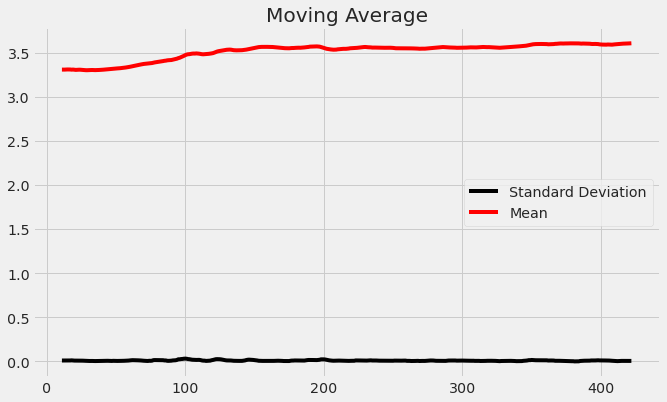

In [70]:
## removing trend element
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(data[0]['Close'])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

<h1 style="font-family: Verdana; font-size: 15px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; background-color: #ffffff; color: red;">Split Data into Train and Test&nbsp;&nbsp;&nbsp;&nbsp;</h1> 

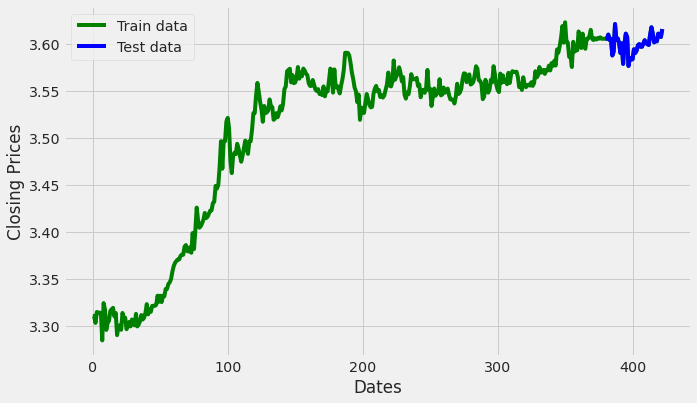

In [71]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2409.318, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-2434.366, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-2434.164, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2408.974, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-2432.564, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-2432.622, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-2430.649, Time=0.32 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-2432.371, Time=0.04 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0] intercept
Total fit time: 0.951 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  377
Model:               SARIMAX(1, 1, 0)   Log Likelihood                1220.183
Date:                Thu, 01 Jul 2021   AIC                          -2434.366
Time:                       

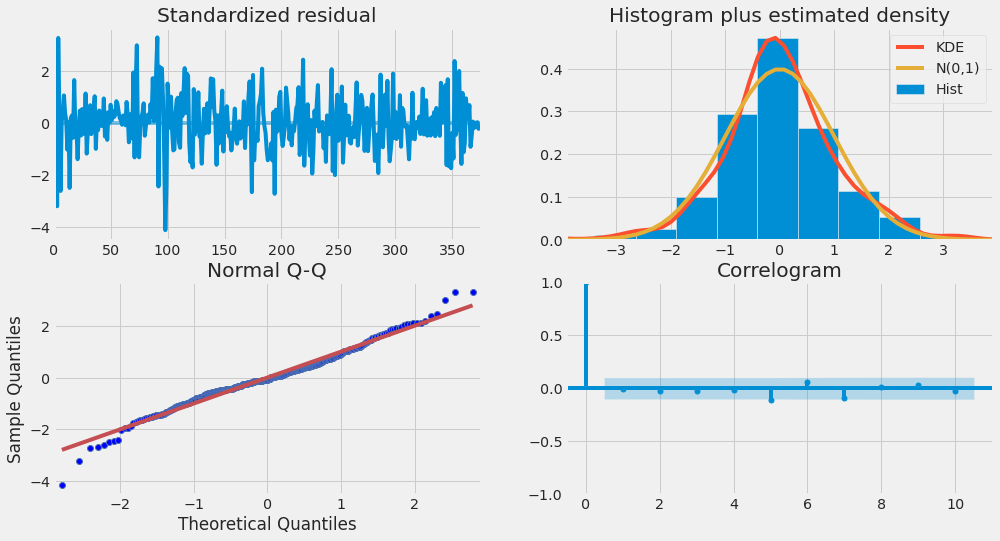

In [72]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

The best ARIMA model with p,d,q values is 1,1,0 and Seasonal P,D,Q with 0,0,0

In [73]:
model = ARIMA(train_data, order=(1,1,0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  376
Model:                 ARIMA(1, 1, 0)   Log Likelihood                1220.183
Method:                       css-mle   S.D. of innovations              0.009
Date:                Thu, 01 Jul 2021   AIC                          -2434.366
Time:                        07:59:01   BIC                          -2422.577
Sample:                             1   HQIC                         -2429.686
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0008      0.000      2.010      0.044    1.93e-05       0.002
ar.L1.D.Close    -0.2631      0.050     -5.297      0.000      -0.360      -0.166
                                    Root

In [78]:
# Forecast
fc, se, conf = fitted.forecast(43, alpha=0.05)  # 95% conf

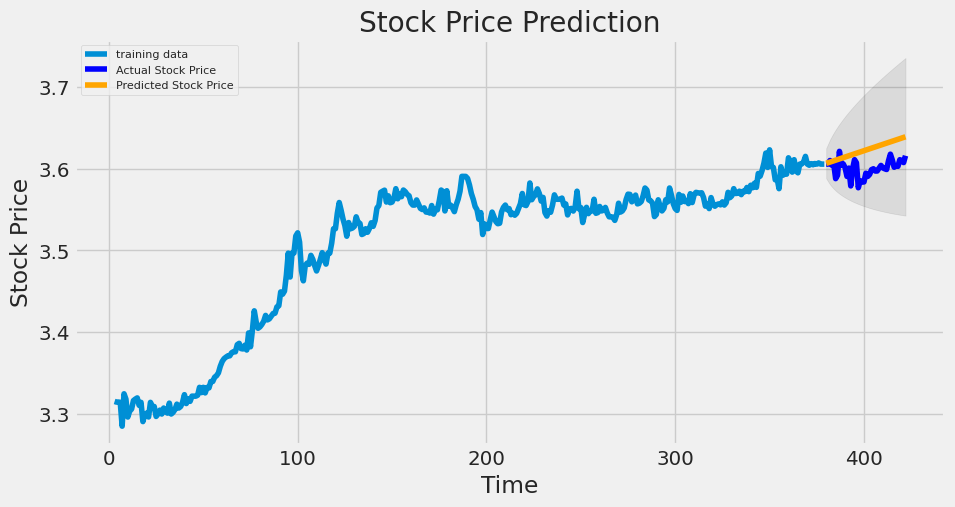

In [81]:
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [80]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.0006411077467299949
MAE: 0.022679383053911404
RMSE: 0.025320105582915624
MAPE: 0.006304198895488971


<a id = "results"></a><h1 id="Libraries and Utilities"><span class="label label-default" style="background-color:#EC5555; border-radius:100px 100px; font-weight: bold; font-family:Garamond; font-size:20px; color:white;padding:10px ">Conclusion and Further Improvement</span></h1>

* LSTM might not be a good model to fit. Some fine tuning on the parameters of LSTM may improve the model accuracy
* Further fine tuning the LSTM may improve the model performance.